In [120]:
import pandas as pd
import json
from collections import defaultdict
import unicodedata
import mistune
from bs4 import BeautifulSoup
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
with open('data/wikivoyage.json','rb') as f:
    data = json.loads(f.read())

In [14]:
articles = data['mediawiki']['page']

In [17]:
# save articles by titles
articles_dict = {}
for article in articles:
    articles_dict[article['title']] = article

In [24]:
# see how many articles have titles with : in them (category:, file:, etc)
junk_articles_dict = defaultdict(int)
for article in articles:
    title = article['title']
    if ':' in title:
        junk_articles_dict[title.split(':')[0]] += 1

print len(junk_articles_dict)
junk_articles_dict

11


defaultdict(<type 'int'>, {u'Category': 4561, u'Itinerary': 1, u'General/Wikivoyage': 1, u'MediaWiki': 142, u'File': 816, u'Poland': 1, u'La Manzanilla': 1, u'Module': 23, u'Wikivoyage': 1561, u'Template': 1043, u'Help': 8})

In [29]:
## SEE CONTENT OF 'SPECIAL' ARTICLES WITH :'S IN THE TITLE
special_articles_dict = defaultdict(list)
for article in articles:
    title = article['title']
    if ':' in title:
        if len(special_articles_dict[title.split(':')[0]]) < 5:
            special_articles_dict[title.split(':')[0]].append(article) 

print len(special_articles_dict)
special_articles_dict.keys()

11


[u'Category',
 u'Itinerary',
 u'General/Wikivoyage',
 u'MediaWiki',
 u'File',
 u'Poland',
 u'La Manzanilla',
 u'Module',
 u'Wikivoyage',
 u'Template',
 u'Help']

In [32]:
special_articles_dict['MediaWiki']

[{u'id': u'69005',
  u'ns': u'8',
  u'revision': {u'comment': u'+arytrekking\\.com',
   u'contributor': {u'id': u'36420', u'username': u'Ikan Kekek'},
   u'format': u'text/x-wiki',
   u'id': u'2796508',
   u'model': u'wikitext',
   u'parentid': u'2781066',
   u'sha1': u'l0bq8j7kgs7ttk8ngewi2h36byn4q61',
   u'text': {u'#text': u'#{{shortcut|[[Spam]]<br>[[Blacklist]]}} \n #{{notice|\'\'\'DO NOT\'\'\' remove any URL or pattern from this list without first gaining consensus on [[{{TALKSPACE}}:{{PAGENAME}}]]. In addition to being used to block automated spam attacks this list is also occasionally used to stop persistent abuse of the [[Project:External links]] and [[Project:Don\'t tout]] policies.  Please add violators of the external links policy to this page \'\'\'ONLY\'\'\' after first trying to educate the user about why the link is inappropriate.  When adding external link violators to this page please explain the reason for the addition on [[{{TALKSPACE}}:{{PAGENAME}}]].}}\n\n # This i

In [ ]:
##TAKE OUT ARTICLES WITH : IN THE TITLE

In [18]:
articles_dict.keys()

[u'Gorakh Hill',
 u'Merlins Bridge',
 u'Category:Articles needing style fixes',
 u'Szczecin',
 u'Category:West High Country',
 u'Rugia',
 u'Ekero',
 u'New Australia',
 u'Natchez, Mississippi',
 u'Cuzam\xe1',
 u'File:WV new main page at 1920px.PNG',
 u'Nampa',
 u'Category:Pangasinan',
 u'Jamaica (disambiguation)',
 u'Xigatse (prefecture)',
 u'York (Maine)',
 u'Calangute Beach',
 u'Category:Wikivoyage collaboration',
 u'Concei\xe7\xe3o da Barra',
 u'Novi Sad',
 u'Wikivoyage:Logbook archives',
 u'Vulcan',
 u'Eure',
 u'Moovattupuzha',
 u'Gravesend',
 u'Turkmen phrasebook',
 u'Soccer',
 u'Caen',
 u'Madeira Islands',
 u'Category:Upper Bavaria',
 u'Miami Springs',
 u'Houston/East Houston',
 u'Warsaw/Bemowo',
 u'Malabon',
 u'Wind surfing',
 u'Hikone',
 u'Wikivoyage:WTS archive/Pub (temporary refuge)/archive',
 u'Pea Ridge',
 u'Airline consolidators',
 u'File:ChicagoFarNWSideBanner2.jpg',
 u'Kearney',
 u'Goshen',
 u'Loei',
 u'Loen',
 u'Template:Talkback',
 u'Pergamon',
 u'Paris/Champs Elysee',


In [20]:
articles_dict['Category:Wikivoyage collaboration']

{u'id': u'79520',
 u'ns': u'14',
 u'revision': {u'comment': u'Created page with "Pages used for voting, nominations and collaboration.  [[Category:Project]]"',
  u'contributor': {u'id': u'1844', u'username': u'Globe-trotter'},
  u'format': u'text/x-wiki',
  u'id': u'1891152',
  u'model': u'wikitext',
  u'sha1': u't4uoxi18vu44ty3gm43t7ze0uacz4wr',
  u'text': {u'#text': u'Pages used for voting, nominations and collaboration.\n\n[[Category:Project]]',
   u'@xml:space': u'preserve'},
  u'timestamp': u'2012-09-26T11:57:03Z'},
 u'title': u'Category:Wikivoyage collaboration'}

In [38]:
# articles without :'s in their titles
articles_dict = {}
for article in articles:
    title = article['title'].encode('utf-8')
    if ':' not in title:
        articles_dict[title] = article

print len(articles_dict)
articles_dict

44050


{'Szczecin': {u'id': u'34976',
  u'ns': u'0',
  u'revision': {u'contributor': {u'id': u'244322',
    u'username': u'Double sharp'},
   u'format': u'text/x-wiki',
   u'id': u'2763935',
   u'minor': None,
   u'model': u'wikitext',
   u'parentid': u'2739009',
   u'sha1': u'jfmz1rvkzz1nfe7dqzq0izms4v764dh',
   u'text': {u'#text': u'{{pagebanner|Szczecin Wikivoyage Banner.png}}\n\n\'\'\'[http://www.szczecin.eu/en/ Szczecin]\'\'\', (pronounced \'\'Shchetsin\'\', German: \'\'Stettin\'\', Latin: \'\'Stetinum\'\'; is maritime port city and the capital of [[Zachodniopomorskie]] in [[Poland]]. The city has a population of over 400 000 thousand, with almost 800 000 living its metro area, and is one of the seven largest metropoles in the country. It lies in the northwestern corner of Poland, very close to the German border, and it is in fact easier to get to Szczecin from some parts of Germany, notable from [[Berlin]], than it is from much of the Polish territory. For a significant part of its hist

In [49]:
# see article lengths
article_lengths_dict = {}
for key, value in articles_dict.iteritems():
    article_length = len(value['revision']['text']['#text'])
    article_lengths_dict[key] = article_length

article_lengths_dict

{'Szczecin': 33999,
 'San Juan Islands': 21187,
 'Rugia': 11293,
 'New Australia': 875,
 'Natchez, Mississippi': 21,
 'Nampa': 7084,
 'Jamaica (disambiguation)': 380,
 'Xigatse (prefecture)': 1794,
 'York (Maine)': 19321,
 'Ko\xc5\x82obrzeg': 2778,
 'Calangute Beach': 23,
 'Fulda': 9523,
 'Novi Sad': 26800,
 'Eure': 28,
 'Moovattupuzha': 26,
 'Gravesend': 1874,
 'Turkmen phrasebook': 3126,
 'Caen': 5997,
 'Madeira Islands': 21,
 'Miami Springs': 896,
 'Houston/East Houston': 4176,
 'Gwangalli': 26,
 'Malabon': 1082,
 'Wind surfing': 24,
 'Hikone': 7609,
 'Br\xc4\x83ila County': 22,
 'Pea Ridge': 2272,
 'Airline consolidators': 36,
 'Kearney': 20,
 'Mokhotlong': 1467,
 'Loei': 7551,
 'Loen': 19,
 'Pergamon': 21,
 'Paris/Champs Elysee': 38,
 'Central Limburg (Belgium)': 31,
 'Rio de janerio': 28,
 'South Uist': 9641,
 'Cahir': 1378,
 'Volta Delta': 563,
 'Jeffersonville': 703,
 'Indian Harbour Beach (Florida)': 34,
 'Orcas Village': 7316,
 'Scituate (Rhode Island)': 12021,
 'Se\xc5\xbean

In [53]:
df_article_lengths = pd.DataFrame(article_lengths_dict.items(), columns = ['title', 'length'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x157cd1250>]], dtype=object)

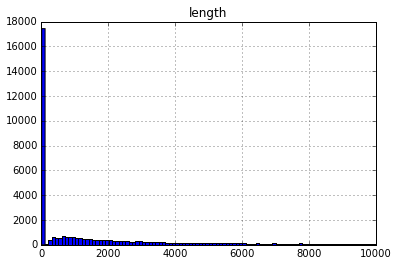

In [82]:
### STUDY HOW MANY CHARS ARTICLES HAVE.
condition1 = df_article_lengths['length'] < 10000
df_article_lengths[condition1].hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1593c3990>]], dtype=object)

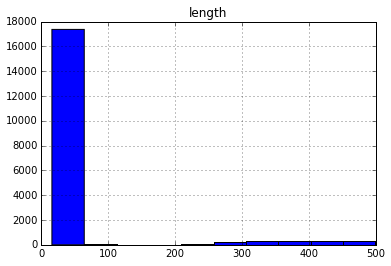

In [94]:
### STUDY HOW MANY CHARS ARTICLES HAVE.
condition2 = df_article_lengths['length'] < 500
df_article_lengths[condition2].hist(bins=10)

## IT CAN BE SEEN THAT THERE ARE ABOUT 17,000 ARTICLES LESS THAN 200 CHARACTERS.
## ARTICLES WITH LESS THAN 200 WORDS WOULD MEAN THEY DON'T HAVE GOOD DESTINATION DESCRIPTONS, MEANING THEY AREN'T
## POPULAR DESTINATIONS.

In [95]:
condition3 = df_article_lengths['length'] < 200
df_article_200_char_plus = df_article_lengths[-condition3]

In [96]:
final_titles = df_article_200_char_plus['title']

In [98]:
final_titles.head(10)

0                     Szczecin
1             San Juan Islands
2                        Rugia
3                New Australia
5                        Nampa
6     Jamaica (disambiguation)
7         Xigatse (prefecture)
8                 York (Maine)
9                    Kołobrzeg
11                       Fulda
Name: title, dtype: object

In [111]:
final_dict = {}
for title in final_titles:
    final_dict[title] = unicodedata.normalize('NFKD', articles_dict[title]['revision']['text']['#text']).encode('ascii','ignore')
final_dict
print len(final_dict)

26599


In [ ]:
#mistune.markdown(final_dict['Szczecin'])

In [ ]:
#BeautifulSoup(test).text

In [ ]:
#final_dict['Szczecin']

In [134]:
test = final_dict['Szczecin'].replace('[', '').replace(']','').split('\n')

In [135]:
new_article = []
for line in test:
    if line != '':
        new_article.append(line)

In [136]:
new_article

['{{pagebanner|Szczecin Wikivoyage Banner.png}}',
 "'''http://www.szczecin.eu/en/ Szczecin''', (pronounced ''Shchetsin'', German: ''Stettin'', Latin: ''Stetinum''; is maritime port city and the capital of Zachodniopomorskie in Poland. The city has a population of over 400 000 thousand, with almost 800 000 living its metro area, and is one of the seven largest metropoles in the country. It lies in the northwestern corner of Poland, very close to the German border, and it is in fact easier to get to Szczecin from some parts of Germany, notable from Berlin, than it is from much of the Polish territory. For a significant part of its history, actually, Szczecin was a part of Germany, as well as, in other periods, of Denmark and Sweden.",
 "Szczecin is Poland's third-largest port and much of its industrial base used to be a part of an important shipyard, so it may come as a surprise to the casual tourist that the city does not lay on a seaside, but rather over the river Odra (German: ''Oder'